# Проектная работа

# Исследование объявлений о продаже квартир

Задача: 
 - проанализировать данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет
 - установить какие параметры и каким образом, влияющие на рыночную стоимость жилых объектов
 
Пояcнения для входного файла:
 - для анализа доступен файл в формате .csv (`real_estate_data.csv`)
 - по каждой квартире на продажу в файле указаны два вида данных. Первые внесены пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка. 

## Знакомство с входными данными

Прежде всего прочитаем данные `real_estate_data.csv` и выведем первые 5 строчек на экран

In [116]:
import pandas as pd

data = pd.read_csv('/Users/uliabubnova/Downloads/real_estate_data.csv', sep='\t')

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Видим, что в качестве разделителя использован символ табуляции '\t'. 
Прочитаем файл повторно, учитывая разделитель.
Данные запишем в переменную `data` и подробнее изучим первые 10 строк получившегося DataFrame.

In [2]:
data = pd.read_csv('/Users/uliabubnova/Downloads/real_estate_data.csv', sep='\t')

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Первые выводы: 
- в DataFrame 22 столбца
- во многих столбцах есть пропущенные значния (необходимо будет обрабатывать пропуски)
- заметны несоответствия типов данных (необходимо будет изменить типы данных в некоторых столбцах)

Выведем более детальную информацию о DataFrame

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В  DataFrame 22 столбца и 23 699 строк.

На первый взгляд, требуется следующая предобработка данных: изучить и обработать пропуски, анамалии данных и неявные дубликаты в DataFrame, исключить явные дубликаты, а также поменять типы данных в некоторых столбцах.

Обработать пропуски в следующих столбцах:
- 5   `ceiling_height`
- 6   `floors_total`
- 7   `living_area`
- 9   `is_apartment`
- 12  `kitchen_area`
- 13  `balcony`
- 14  `locality_name`
- 16  `cityCenters_nearest`
- 17  `parks_around3000`
- 18  `parks_nearest`
- 19  `ponds_around3000`
- 20  `ponds_nearest`
- 21  `days_exposition`

Найти и иключить всевозможные дубликаты и аномалии:
- во всех столбцах

Изменить тип данных в следующих столбцах:
- 3   `first_day_exposition`   object  ->  datetime
- 6   `floors_total`           float64  ->  int
- 9   `is_apartment`           object   ->  bool
- 13  `balcony`                float64  ->  int
- 17  `parks_around3000`       float64  ->  int
- 19  `ponds_around3000`       float64  ->  int
- 21  `days_exposition`        float64  ->  int



Построим гистограммы по датафрейму `data`, чтобы визуально оценить распределение значений по столбцам

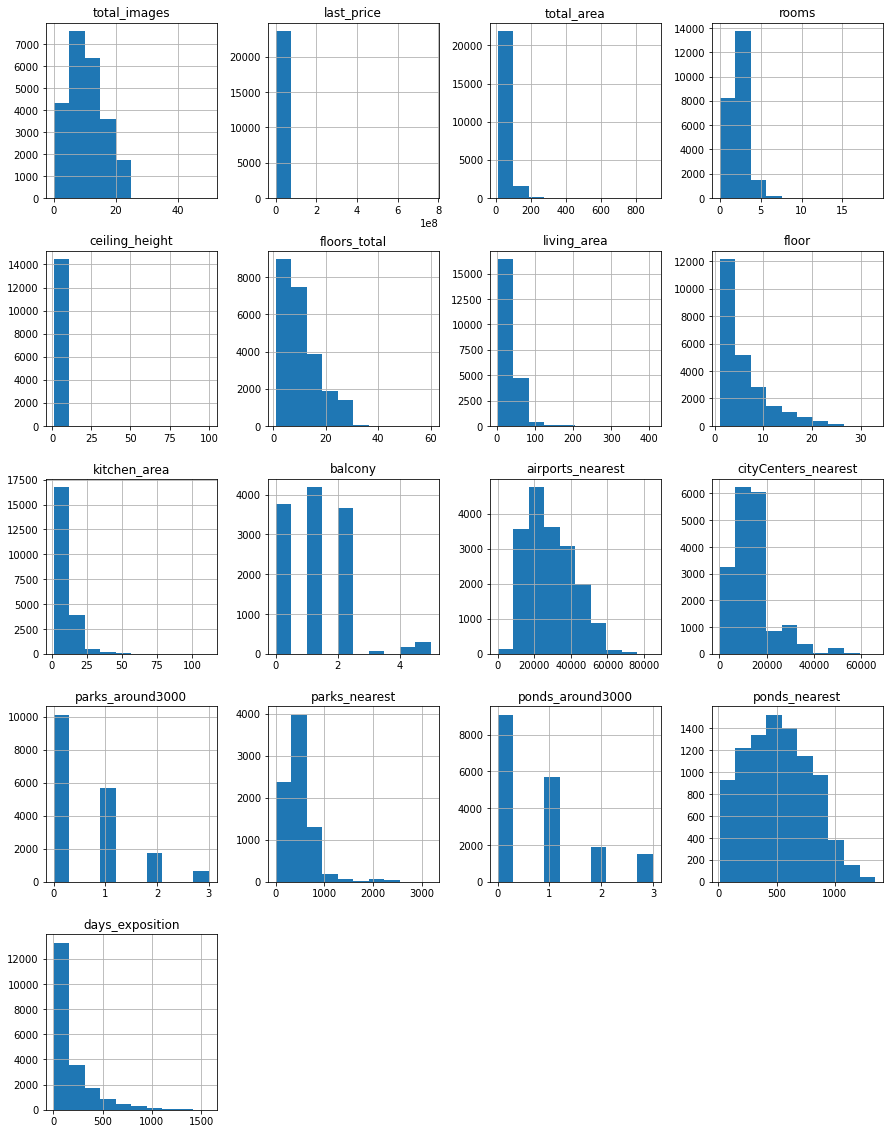

In [4]:
data.hist(figsize=(15, 20));

Не везде масштаб удачный, но по получившимся гистограммам можно сделать следующие  предварительные выводы:
 - большинство продавцов добавляют 10-15 фото квартиры, редко фото в объявлении более 25 шт **- это похоже на правду**
 - цена квартир не превышает 50-70 млн руб **- масштаб неудачный, но тоже пока не противоречит истине**
 - квартиры в подавляющем большинстве площадью до 100 м.кв и имеют до 4 комнат **-похоже на правду**
 - жилая площадь в большинстве своем до 50 м.кв, а кухня около 12 м.кв **-с общей площадью хорошо соотносятся**
 - высота потолков и этажность **-выглядят реалистично**
 - заметны выбивающиеся данные по балконам (более 4ех) **-их надо изучить детальнее**
 - картографические данные **-выглядят реалистично**
 - большая часть квартир продается в течение нескольких месяцев, но по гистаграмме также заметны "висяки", которые продаются годами **-надо разобраться**
 

In [5]:
# Рассмотрим корреляцию всех параментров фатафрейма между собой
data.corr()

/var/folders/l7/dxdpx91s78qdx05dfqxw3rrr0000gn/T/ipykernel_23540/2949462084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


В первом приближении можно сделать вывод, что цена квартиры зависит в большей степени от площади и количества комнат.

## Предобработка данных

## Начнем с обработки пропусков и анамалий в данных. 

### 1. Столбцы `floors_total` и `locality_name`


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропущены значения в столбцах `floors_total` и `locality_name` - это скорее всего человеческий фактор (пользователь не знал, что указать, забыл название или количество этажей, не нашел своего населенного пункта в списке и тп) или системный сбой - не сохранились данные (это менее вероятно). 

In [7]:
# определим количество пропусков в обоих столбцах
data[['floors_total', 'locality_name']].isna().sum()

floors_total     86
locality_name    49
dtype: int64

Значения в столбце `locality_name` - населенный пункт, имеют строковый тип, их крайне сложно заменить чем-то или восстановить. Этажность поддается прогнозированию, можно расчитать медианное значение этажности в каждом населенном пункте.
Но так как пропусков в столбцах `floors_total` и `locality_name` крайне мало (около 0.5% от всего объема датафрейма) - можно расстаться с ними безболезненно и не боятся потерять информативность данных.

In [8]:
#удалим пропуски в двух столбцах
data = data.dropna(subset=['floors_total', 'locality_name'])

#проверим, что пропуски исчезли, как нужно
data[['floors_total', 'locality_name']].isna().sum()

floors_total     0
locality_name    0
dtype: int64

In [9]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Оценим крайние значения. Если к минимуму в 1 этаж придраться нельзя, то жилое здание в 60 этажей выглядит высоковато даже для Питера. Википедия сообщает, что самы высотный ЖК в Питере на сегодня, имеет 37 этажей [ссылка на Википедию](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0). 

Поэтому стоит исключить выбросы с этажностью более 37 этажей - их всего 2 (см. код ниже)

In [10]:
# определим количество выбросов
data.query('floors_total>37')['floors_total'].count()

2

In [11]:
# осталяем в датафрейме только объекты в домах не выше 37 этажей
data = data.query('floors_total<=37')

<AxesSubplot:>

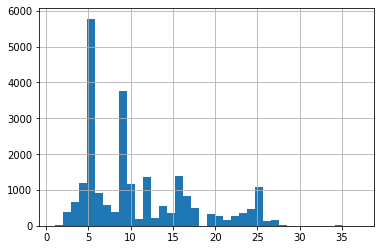

In [12]:
data['floors_total'].hist(bins=38)

По гистограмме видны два ярковыраженных пика - это соответствует 5ти-этажным "хрущевкам" и 10-этажным "панелькам", которое повсеместно распространены в России. Небольшие пики правее скорее всего соответсвуют более свежим постройкам, где высотность зданий доходит до 25ти этажей.

### 2.  Столбец `ceiling_height`.

Теперь разберемся с данными в `ceiling_height`. Чаще всего отсутствие данных о высоте потолка, связано с тем, что человек не указал этот параметр при создании объявления (забыл/не знает точно). 


In [13]:
data['ceiling_height'].isna().sum()

9084

Видим, что пропущенных данных прилично, около 40%.
Хорошая новость, что высота потолка чаще всего однотипна и должная быть близка к 2.7м. Проверим это предположение.
Для начала выведем подробную информацию о данных, хранящихся в столбце `ceiling_height` и построим гистограмму.

In [14]:
data['ceiling_height'].describe()

count    14479.000000
mean         2.771284
std          1.262069
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

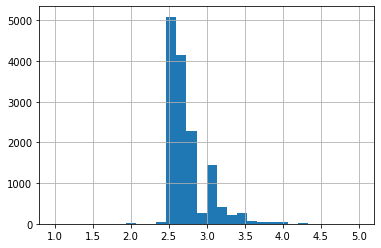

In [15]:
data['ceiling_height'].hist(bins=30, range=(1,5))

Среднее и медиана достаточно близки и похожи на реальность (около 2.7 м). На гистограмме глобальный всплеск в райне 2.5-2.7 м и небольшой подъем в районе 3 м, но все-таки есть некоторые аномальные выбросы с каждого края. Помещения с высотой потолка 1м или 100м врядли существуют в жизни.

Можно сказать, что в Спб и Ленинградской области есть два типа высоты потолков - это стандартные потолки, высота которых колеблется от 2.5-2.7 м и так называемые "Питерские сталинки" с высотой потолка 3-3.2 м.

Соотвественно с данными в столбце `ceiling_height` сделаем следующее:
 - заменим пропуски на медианные значения, но все же учитывая населенный пункт (ведь высота потолков в квартирах в СПб и в Ленинградской Области могут отличаться, так как в районе 3м есть небольшой всплеск)
 - заменим аномальные значения (выбросами будем считать потолки высотой более 3.8 м и менее 2,4м) тоже на медиану
 


In [16]:
# оценим количество выбросов в столбце
data.query('ceiling_height>=3.8 | ceiling_height<=2.4')['ceiling_height'].count()

210

Заменим пропуски и выбросы на медиану по каждому населенному пункту.

In [17]:
import warnings
warnings.filterwarnings('ignore')
# перебираем уникальные названия мест и присваиваем пропускам  и выбросам медианные значения высоты в этой местности
for place in data['locality_name'].unique():
    
    # заменяем аномалии   
    data.loc[(data['locality_name'] == place) & ((data['ceiling_height']>=3.8) | (data['ceiling_height']<=2.4)), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == place), 'ceiling_height'].median()
    
    # заменяем пропуски
    data.loc[(data['locality_name'] == place) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == place), 'ceiling_height'].median()

    
# проверяем остались ли пропуски
data['ceiling_height'].isna().sum()

120

Осталось 120 пропущенных значений. Предположим, что это те квартиры, по которым не удалось расчитать медиану в конкретном населенном пункте. То есть в этом месте, ни в одном объявлении не указана высота потолка. Проверим эту гипотезу. Выведем 10 любых строк датафрейма, в котрых остались пустые строки в столбце `ceiling_height`.

In [18]:
data[data['ceiling_height'].isna()].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19681,3,1100000.0,29.1,2018-09-25T00:00:00,1,NaN,5.0,16.2,5,NaN,...,6.0,NaN,посёлок Пансионат Зелёный Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
12031,8,1800000.0,41.0,2019-03-14T00:00:00,2,NaN,2.0,25.6,1,NaN,...,5.8,NaN,поселок Кобринское,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16393,10,1800000.0,79.5,2018-10-17T00:00:00,3,NaN,3.0,55.0,3,NaN,...,9.0,NaN,деревня Пижма,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7323,10,1400000.0,62.0,2019-01-11T00:00:00,3,NaN,4.0,44.0,2,NaN,...,7.0,NaN,садоводческое некоммерческое товарищество Лесн...,NaN,NaN,NaN,NaN,NaN,NaN,109.0
21979,18,3099000.0,50.5,2018-09-19T00:00:00,2,NaN,5.0,27.0,4,NaN,...,9.6,NaN,деревня Лупполово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
17305,7,2450000.0,47.5,2016-01-16T00:00:00,2,NaN,5.0,27.0,3,NaN,...,8.5,0.0,поселок городского типа Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,396.0
3468,1,650000.0,34.0,2015-07-15T00:00:00,1,NaN,3.0,18.0,2,NaN,...,7.0,0.0,поселок Цвылёво,NaN,NaN,NaN,NaN,NaN,NaN,377.0
16905,5,1650000.0,43.0,2018-12-16T00:00:00,2,NaN,4.0,NaN,2,NaN,...,NaN,NaN,посёлок Перово,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10183,10,1600000.0,28.7,2018-03-15T00:00:00,2,NaN,2.0,21.6,1,NaN,...,4.8,NaN,посёлок Форт Красная Горка,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12003,10,950000.0,37.1,2019-05-03T00:00:00,1,NaN,4.0,17.0,4,False,...,8.4,2.0,деревня Курковицы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так как каждый раз этот срез датафрейма будет меняться рандомно, то зафиксируем себе три названия местности, по которым проверим выдвинутую ранее гипотезу. Например возьмем: поселок Кирпичное, деревня Торошковичи, посёлок Шугозеро. Проверим есть ли в этих населенных пунктах непустые значения в столбце `ceiling_height`.

In [19]:
data[(data['ceiling_height'].notna()) & ((data['locality_name']=='посёлок Шугозеро') | \
                                        (data['locality_name']=='поселок Кирпичное') | \
                                        (data['locality_name']=='деревня Торошковичи'))]['locality_name'].count()

0

Так как строки вывелись абсолютно произвольно, внутри среза дынных мы тоже взяли три населенных пункта наугад, то можно с достаточной уверенностью сказать, что наша гипотеза подтвердилась и все данные о высоте потолка в этих населенных пунктах не указаны.
Данные пропуски можно либо удалить, либо заменить на медианное значение высоты. Так как мы убедились, что значения потолка достаточно однородны, то здесь логично заменить оставшие пропуки медианой.

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

# еще раз проверим столбец на пропуски
data['ceiling_height'].isna().sum()

0

Все пропуски и анамалии высоты потолка заполнены медианными значениями. Теперь этот столбец готов к дальнейшей обработке.


###  3. Столбец `rooms`.

Теперь проанализируем столбец `rooms`. Пропусков в этом столбце не было. Выведем все уникальные значения этого столбца и их количества.

In [21]:
data['rooms'].value_counts()

1     8003
2     7896
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

<AxesSubplot:>

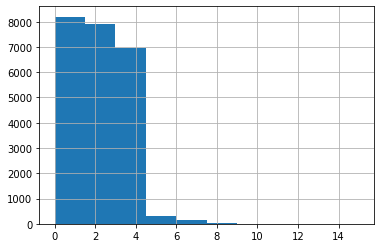

In [22]:
data['rooms'].hist(range = (0,15))

Большинство помещений в продаже имеют не более 4ех комнат. 
5ти-комнатные квартиры встречаются крайне редко, а жилые помещения с 6-тью и более комнатами практически не размещаются на портале Яндекс.Недвижимость (в сумме их доля менее 1%). 

Удалим из датафрейма все объявления с 6-тью и более комнатами, так как для прогнозирования по ним недосточно данных. 

Изучим данные в столбце `rooms`, а для наглядности постороим итоговую гистограмму по этому столбцу на 6 корзин.

In [23]:
# удаляем строки, где комнат больше 6 и выводим информацию об оставщихся значениях в столбце
data = data.query('rooms<6')

# проверим значения еще раз
data['rooms'].value_counts()  

1    8003
2    7896
3    5779
4    1172
5     325
0     194
Name: rooms, dtype: int64

<AxesSubplot:>

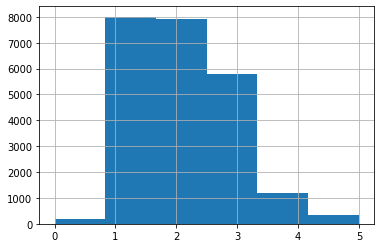

In [24]:
# обновленная гистограмма
data['rooms'].hist(bins=6)

Данные удалились верно, теперь в базе остались только квартиры, у которых не более 5-ти комнат.
Визуально видно, что более 2/3 всех квартир - это 1 и 2-ух комнатные квартиры, немного меньше "трешек". Явно большой разрыв в количестве значений в первом (0 комнат) и шестом (5 комнат) столбцах. Порассуждаем можно ли их также удалить из датафрейма.
- 0 комнат - скорее всего указывают владельцы студий. Но логично предположить, что квартир-студий на рынке недвижимости должно быть сопоставимо по количеству с 1 и 2ух комнатными квартирами. Значит большинство людей указывают в обьявлении 1 комнату, несмотря на то, что у них студия. Только некоторые ставят 0 в графе `rooms` - их не стоит учитывать, так как большая часть данных по студиям включена в однокомнатные квартиры. **Вывод: 0-комнат тоже удалим**
- 5-ти комнатные квартиры  пока оставим для дальнейшего анализа

In [25]:
# удаляем строки, где 0 комнат
data = data.query('rooms!=0')
data['rooms'].value_counts()  

1    8003
2    7896
3    5779
4    1172
5     325
Name: rooms, dtype: int64

Теперь данные в столбце `rooms` готовы для дальнейшего анализа. Мы избавились от крайне редко встречающихся и совсем единичных значений, которые не пригодны для дальнейшего обучения аналитической системы.

 ### 4. Столбец `living_area`
 
Для начала посмотрим общее статистическое описание значений столбца и визуализируем их гистограммой.
 

In [26]:
data['living_area'].describe()

count    21334.000000
mean        33.599893
std         18.570366
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        301.500000
Name: living_area, dtype: float64

Разброс значений очень велик, стандартное отклонение среднего почти 18, при среднем 33. Есть явные аномальные значения: 2 кв.м -неправдоподобно мало, а 301 кв.м  - это может встретиться только в единичных домах.

<AxesSubplot:>

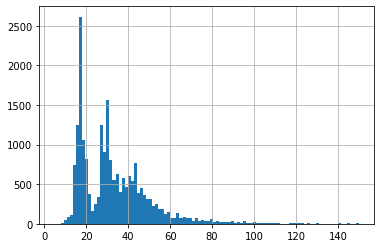

In [27]:
data['living_area'].hist(bins=100, range = (5,150))

Гистограмма дала больше информации:
- имеется два ярковыраженных пика - соответствующих 1 и 2х-комнатным квартирам соответственно. Первый пик в районе 15-18 кв.м (примерная одной комнаты), второй примерно 30-35 кв.м (какраз соответсвует 2ум комнатам). Это очень похоже на правду.
- после 40 кв.м гистограмма снижается более плавно, только выделяется небольшой подъем в районе 42-45 кв.м - это похоже на жилую площадь в большинстве стандартных 3-х комнатных квартир.
- ярковыраженный провал в районе 25 кв.м - тоже согласуется с логикой. В "однушках" редко площадь комнаты 20-25 кв.м, а для "двушек" эта площадь часто недостаточна.

Поймем сколько пропущено значений в этом столбце.

In [28]:
# оценим количество пропусков
data['living_area'].isna().sum()

1841

Данные пропущенные значения появляются чаще всего тогда, когда человек не знает точно, что там написать. Но жилая площадь должна зависеть от общей площади квартиры и количества комнат (это и подтверждает общая таблица коррелящии, которую мы получили в начале исследования).

Еще раз расчитаем коэффициент корреляции жилой площади с общей площадью квартиры и количеством комнат в ней.

In [29]:
data['living_area'].corr(data['total_area'])

0.9259671382445509

In [30]:
data['living_area'].corr(data['rooms'])

0.8412756323867919

Видим прямую очень сильную зависимость жилой площади от общей и количества комнат. Для замены пустых значений в датафрейме можно использовать данные по обоим этим параметрам. Но так как корреляция по общей площади все же чуть выше, заменим пропуски на данные расчитанные относительно общей площади помещения.

In [31]:
# рассчитаем коэффициент между общей и жилой площадью, как отношение суммы всех жилых площадей к сумме всех общих площадей
# но расчет будем вести только по тем строкам, у которых нет пропуска в 'living_area'.
area_koef = data['living_area'].sum()/data.loc[data['living_area'].notna(), 'total_area'].sum()
area_koef

0.5708740896400561

Выведем контрольный срез датафрейма.
Предположим, что большинство тех, кто не указал жилую площадь, так же не внесли и площадь кухни. Для того, чтобы в дальнейшем проверить замененные значения, выведем 10 строк датафрейма, по условию, что  в строках пропуск в `kitchen_area`. 

In [32]:
# выведем контрольные 10 строк
data[data['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7000,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.5600,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5000,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.7000,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.7000,13.0,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.7000,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.7000,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.6075,25.0,NaN,16,NaN,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.7000,25.0,NaN,6,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.5000,3.0,183.0,3,NaN,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0


Действительно, в 9ти из 10ти строк данные в обоих столбцах (жилая площадь и площадь кухни) не заполнены. По этим строкам (с пропусками площади кухни) после замены Nan в living_area будет легко проверить правильность этих замен.

In [33]:
# заменим пропуски на соответствующие доли от общей площади
data.loc[data['living_area'].isna(), 'living_area'] = \
data.loc[data['living_area'].isna(), 'total_area']*area_koef

# проверим столбец на наличие пропусков еще раз
data['living_area'].isna().sum()

0

In [34]:
# повторно выведем контрольные 10 строк
data[data['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7000,14.0,90.768980,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.5600,9.0,18.724670,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5000,5.0,26.146033,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.7000,22.0,22.834964,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.7000,13.0,26.545645,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.7000,12.0,19.980593,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.7000,10.0,38.819438,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.6075,25.0,45.955364,16,NaN,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.7000,25.0,17.697097,6,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.5000,3.0,183.000000,3,NaN,...,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0


Все пропуски заменены верно.

После того, как пропущенные значения обработаны, можно обрабатывать аномалии данных.

In [35]:
data['living_area'].describe()

count    23175.000000
mean        33.736471
std         18.889426
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        301.500000
Name: living_area, dtype: float64

Аномальными будем считать значения жилой площади 
- менее 8 кв м - это достаточно даже для небольшой студии, все, что меньше будет скорее исключением
- более 130 кв м  - так как мы ограничили наш датафрейм 5-ти комнатными квартирами, то 130 это достаточная максимальныя площадь, для таких квартир. Варианты большей площади встречаются крайне редко и по ним лучше не строить обучающую модель систкмы скоринга.

In [36]:
data.query('living_area < 8 | living_area > 130')['living_area'].count()

97

In [37]:
data = data.query('living_area >= 8 & living_area <= 130')

Выведем итоговое описание данных в столбце `living_area`


In [38]:
data['living_area'].describe()

count    23078.000000
mean        33.231630
std         16.787249
min          8.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        130.000000
Name: living_area, dtype: float64

### 5. Столбец `kitchen_area`

Проведем аналогичные операция для значений площади кухни.

In [39]:
# определим сколько пропусков в столбце
data['kitchen_area'].isna().sum()

1990

Пропуски в площади кухни возникают аналогичным образом, как и пропуски по жилой площади. Чаще всего это человеческий фактор, люди не знают точно какое значение там указать.

In [40]:
# выведем общее описание столбца
data['kitchen_area'].describe()

count    21088.000000
mean        10.390472
std          5.486135
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

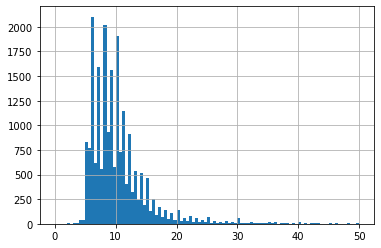

In [41]:
# сформируем гистограмму
data['kitchen_area'].hist(bins=100, range = (0,50))

Получается, что величина кухни не так явно варьируется в зависимости от общей площади квартиры. Между 1ым и 3им квантилями разница всего в 4 кв.м, то есть большинство значений площадей лежат в диапазоне от 7 до 11 кв.м.
Гистограмма имеет длинный правый "хвост", что говорит о большом количестве высоких редковстречающихся значений.
Корреляционная таблица в начале исследования показывала, что площадь кухни коррелирует с площадью квартиры примерно с коэффициаентом около 0.6
Расчитаем коэффициент кореляции между площадью кухни и общей площадью еще раз, а также жилой площадью.

In [42]:
data['kitchen_area'].corr(data['total_area'])

0.5768786139900021

In [43]:
data['kitchen_area'].corr(data['living_area'])

0.335608256871902

Площадь кухни зависит больше от общей площади квартиры, но это зависимость не такая сильная, как у жилой площади.

Ввиду того, что площадь кухни не так сильно зависит от общей площади квартиры и в целом часто находится в пределе значений 7-11 кв.м, то в этом случае уместно заменить пропуски медианными значениями.

In [44]:
# заменим пропуски медианой
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Пропуски заменены, теперь осталось оценить количество аномальных значений. К ним отнесем площади кухни менее 3ех квадратов (ведь даже в студии, кухонная зона обычно не меннее 3-4 кв.м), а также кухни более 40 кв.м

In [45]:
data.query('kitchen_area<3 | kitchen_area>40')['kitchen_area'].count()

113

Таких значений не более 0.5%, поэтому лучше их исключить, это не повлияет на информативность датафрейма.

In [46]:
# перезаписываем отфильтрованный датафрейм
data = data.query('kitchen_area>=3 & kitchen_area<=40')

In [47]:
# еще раз проверяем, что пропусков не осталось
data['kitchen_area'].isna().sum()

0

In [48]:
# еще раз убедимся, что в датафрейме только нужные нам значения
data['kitchen_area'].describe()

count    22965.000000
mean        10.093938
std          4.437379
min          3.000000
25%          7.200000
50%          9.000000
75%         11.280000
max         40.000000
Name: kitchen_area, dtype: float64

Теперь в значениях площадей кухонь не осталось пропущенных значений, а также аномальных выбросов.

### 6. Столбец `balcony`

Рассмотрим какие значения в этом столбце присутствуют, а также определим число пропусков.

In [49]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [50]:
data['balcony'].isna().sum()

11168

<AxesSubplot:>

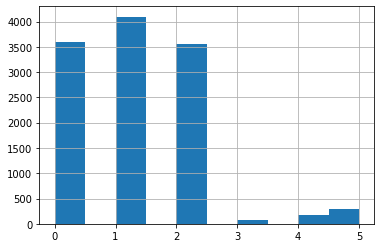

In [51]:
data['balcony'].hist()

Большинство квартир имеют 1-2 балкона или не имеют его вовсе - это кажется вполне реалистичным. Но вот квартиры с 3мя, 4мя, а тем более пятью балконами встретишь редко. Смущает тот факт, что судя по гистограмме, квартир с 4-5 балконами даже больше, чем с 3мя. 

Стоит посмотреть что же это за квартиры с таким количеством балконов. Выведем 20 строк для примера.

In [52]:
data.query('balcony>=3').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.70,14.0,59.000000,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.900000,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000.0,97.2,2017-11-13T00:00:00,3,2.50,16.0,55.488962,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
121,20,33000000.0,180.0,2017-02-17T00:00:00,3,2.90,9.0,86.000000,8,False,...,24.0,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
250,13,3200000.0,51.7,2019-01-22T00:00:00,2,2.65,16.0,29.200000,5,NaN,...,7.7,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
267,2,14700000.0,120.0,2018-09-07T00:00:00,3,2.75,20.0,63.000000,18,NaN,...,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000.0,86.0,2018-10-19T00:00:00,3,2.80,25.0,47.000000,3,NaN,...,13.0,5.0,Санкт-Петербург,52192.0,15686.0,0.0,NaN,1.0,441.0,NaN
336,10,7700000.0,79.0,2019-03-11T00:00:00,3,2.90,12.0,47.000000,11,NaN,...,15.0,5.0,Санкт-Петербург,38622.0,14116.0,0.0,NaN,0.0,NaN,NaN
371,11,7300000.0,65.0,2018-09-12T00:00:00,2,2.70,12.0,30.040000,2,NaN,...,10.2,5.0,Санкт-Петербург,18621.0,17623.0,1.0,1510.0,2.0,372.0,92.0
375,20,25000000.0,140.0,2017-11-25T00:00:00,3,2.80,25.0,60.000000,21,NaN,...,30.0,4.0,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,188.0


Видим, что большое количество балконов встречается почему-то и в 1-2х комнатных квартир. 

Напрашивается вывод, что люди по ошибке указывали не количество балконов, а их площадь. Ведь балкон 3-5 кв.м вполне реален даже для "однушки". 
Так как количество балконов имеет практически нулевую корреляцию с другими параметрами (то есть особо не влияет на стоимость и далее не будет использоваться в исследовании), то не будем ничего менять в уже имеющихся значениях, а оработаем только пропуски. Пропуски заменим 0, так как логично предположить, что данные о количестве балконов не указывают люди, которые не имеют балкона в квартире.

In [53]:
# заменим пропуски на ноль и еще раз выведем уникальные значения
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

### 7. Столбец `total_area`

In [54]:
data['total_area'].describe()

count    22965.000000
mean        57.943051
std         26.008557
min         12.000000
25%         40.000000
50%         52.000000
75%         68.300000
max        365.000000
Name: total_area, dtype: float64

<AxesSubplot:>

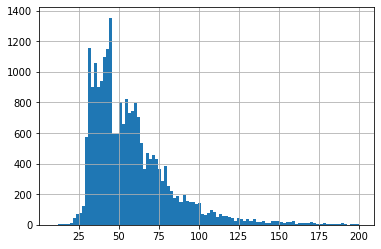

In [55]:
data['total_area'].hist(bins=100, range=(10, 200))

In [56]:
data['total_area'].isna().sum()

0

Большая часть значений сконцентрирована в области 40-70 кв.м - это как раз соответсвует площадям 1 и 2х комнатных квартир, которых в базе большинство. Пик около 48 кв.м может возникнуть за счет того, что с такой площадью бывают как "однушки", так и "двушки".

Небольшой провал около 50 кв м. - видимо, такая площадь редкость, как для однокомнатных, так и для двукомнатных квартир.

*Общий вывод*: на гистограмме три возвышенности:
- максимальное количество квартир 30-48 кв.м - это не только однокомнатные, но и небольшие двухкомнатные квартиры. Так как мы знаем, что в целом однушек и двушек продается примерно равное количество, то делаем вывод, что часть двушек тоже вошла в первый пик (например двухкомнатные студии)
- второй пик - это двухкомнатные квартиры, и небольшая часть трешек
- третий самый неяркий пик - это трехкомнатные квартиры. Правый хвост гистограммы пологий и длинный - это тоже объяснимо, ведь квартиры от 3х комнат и больше практически не имеют пределов по площади.

Наблюдаются выбросы со значениями более 180 кв.м - такая недвижимость в общей массе встречается крайне редко. 
Помещения менее 20 кв.м скорее всего это продаются комнаты. Стоит оценить количество крайних значений в общем дата фрейме, а затем принять решение стоит ли их оставлять для дальнейшего анализа.

In [57]:
data. query('total_area<=20 | total_area>=180')['total_area'].count()

102

Значения действительно единичные, стоит их удалить для чистоты исследования.

In [58]:
# перезапишем отфильтрованный датафрейм
data = data.query('total_area>20 & total_area<180')
# и убедимся, что все изменения верны
data['total_area'].describe()

count    22863.000000
mean        57.443168
std         24.404689
min         20.100000
25%         40.000000
50%         51.700000
75%         68.000000
max        179.700000
Name: total_area, dtype: float64

Столбец `total_area` подготовлен для дальнейшего исследования

### 8. Столбец `last_price`

In [59]:
data['last_price'].describe()

count    2.286300e+04
mean     5.827965e+06
std      4.883780e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      1.240000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

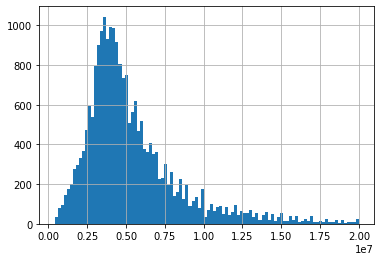

In [60]:
data['last_price'].hist(bins = 100, range=(4*10**5, 2*10**7))

Гистограмма похожа на нормальное распределение, что говорит о реалистичности данных.

Среднее и Медиана различаются практичекси на 1млн - это происходит за счет больших выбросов.
Если учесть, что медианное значение площади получили 51 кв м, а медиана цены - 4.6 млн, то не сложно высчитать медиану цены кв метра - 90 тр за кв.м.
На сегодняшний день (сентябрь 2022 года) это цена кажется очень низкой. Но так как данные в датафрейме были и за 2015-2019 года, возможно, картина соответствует реальности того времени.
Далее в исследовании цена квадратного метра будет подробнее проанализирована.

Сейчас оценим крайние значения распределения. Выведем 10 вариантов квартир, в которых цена ниже 500 тр и 10 объявлений, в которых цена выше 70 млн руб. Рассмотрим подробнее параметры этих квартир и примем решение, стоит ли их оставлять для дальнейшего исследования или правильнее будет их исключть из датафрейма.


In [61]:
data.query('last_price<5*10**5').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.615,1.0,23.000000,1,NaN,...,5.8,0.0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,2.700,5.0,22.834964,3,NaN,...,9.0,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.700,5.0,30.300000,3,NaN,...,5.5,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.500,5.0,17.000000,5,NaN,...,5.5,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.700,3.0,30.827201,3,NaN,...,9.0,0.0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,2.500,2.0,16.000000,1,NaN,...,9.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.650,2.0,21.978652,1,NaN,...,9.0,0.0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.700,5.0,22.834964,1,NaN,...,9.0,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.500,2.0,16.000000,1,NaN,...,6.0,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,2.700,5.0,17.300000,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [62]:
data.query('last_price>7*10**7').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4996,20,124000000.0,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.200000,2,False,...,20.00,0.0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0
5232,2,77612080.0,152.3,2017-09-08T00:00:00,2,3.53,9.0,82.000000,7,False,...,11.00,0.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,341.0
6462,2,82000000.0,114.0,2015-12-17T00:00:00,3,2.70,5.0,78.500000,4,NaN,...,20.00,0.0,Санкт-Петербург,22460.0,3400.0,2.0,218.0,3.0,69.0,651.0
10362,5,83820000.0,153.0,2017-09-29T00:00:00,3,3.20,9.0,82.000000,8,NaN,...,11.00,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,169.0
11336,14,72375000.0,169.3,2015-06-18T00:00:00,4,3.00,8.0,95.400000,4,NaN,...,22.50,0.0,Санкт-Петербург,26398.0,6737.0,3.0,251.0,2.0,599.0,571.0
11430,20,85000000.0,145.7,2018-08-16T00:00:00,3,3.36,5.0,87.230000,5,NaN,...,20.31,1.0,Санкт-Петербург,28371.0,6917.0,2.0,165.0,2.0,500.0,NaN
15726,7,77349000.0,135.7,2017-12-16T00:00:00,3,2.70,7.0,77.467614,5,NaN,...,9.00,0.0,Санкт-Петербург,32950.0,6042.0,3.0,362.0,3.0,246.0,90.0
16590,10,98000000.0,155.0,2017-12-16T00:00:00,3,2.70,8.0,88.485484,6,NaN,...,9.00,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,90.0


В первой выборке всего 8 объявлений из небольших населенных пунктов в Ленинской области, небольшой площади 30-40 кв.м датированные 2016-2019 годами. Скорее всего, в отдаленных и небольших поселениях эта цена адекватна. Эти строки оставим в датафрейме и продолжим анализировать вместе с ними.

Во второй выбоке всего 6 строк - все квартиры из Спб, имеют площадь больлее 100 кв. м, расположены недалеко от центра города и в пешей доступности у них несколько парков и водоемов. Это явно элитные варианты Питерской недвижимости. Но такие варианты нам тоже пригодятся в дальнейшем анализе.
Удалим только одну строку с квартирой за 124 млн руб и площадью 124 кв.м (1 кв.м продают за 1 000 000 руб) - она расположена в центре, кругом парки и каналы и невысокий дом в 4 этажа буквально "смотрит" на канал и парк. Это явно эксклюзивный вариант, который все-таки отнесем к анаомальному значению и удалим его из датафрейма.

In [63]:
data = data.query('last_price<10**8')

### 9. Столбцы `is_apartment`, `studio`, `open_plan`

Эти столбцы подразумевают булевы значения True-False. Судя по названию, в них указывается следующие параметры: апартаменты ли это? студия? открытая ли планировка?

In [64]:
data['is_apartment'].isna().sum()

20167

In [65]:
data['studio'].isna().sum()

0

In [66]:
data['open_plan'].isna().sum()

0

Прокуски есть только в толбце `is_apartment`. Возможно не всем людям понятна разница между квартирой и апартаментами, поэтому оставляют эту графу незаполненной. Логично предположить, что владелец апартаментов знал бы эту разницу, поэтому пропуски заменим на False.

In [67]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Все пропуски заменены.

### 10. Столбцы  `airports_nearest`, `cityCenters_nearest`

Эти и следующие данные заполняются не вручную, а подгружаются системой автоматически. В этих столбцах собрана информация о близости аэропорта и центра города.

In [68]:
data['airports_nearest'].describe()

count    17439.000000
mean     28874.136648
std      12719.788241
min          0.000000
25%      18460.500000
50%      26933.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [69]:
data['cityCenters_nearest'].describe()

count    17459.000000
mean     14380.554785
std       8597.130674
min        181.000000
25%       9593.000000
50%      13216.000000
75%      16379.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Судя по значениям данные хранятся в метрах. Разбег значений большой, как и ожидалось. Смущает значение 0м в столбце `airports_nearest` - ведь в аэропорту жилье точно не продается. 

Построим гистограммы.

<AxesSubplot:>

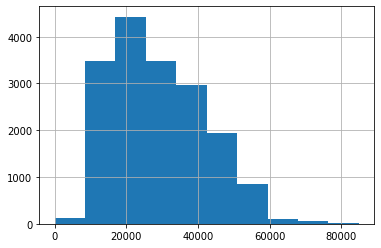

In [70]:
data['airports_nearest'].hist()

<AxesSubplot:>

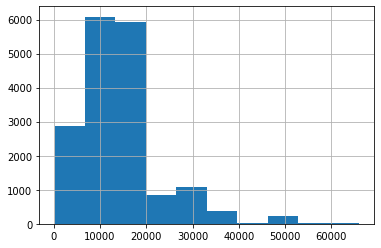

In [71]:
data['cityCenters_nearest'].hist()

Большинство жилых объектов расположено в 10 км от центра города и в 20 км от ближайшего аэропорта - это похоже на правду.

In [72]:
data['airports_nearest'].isna().sum()

5423

In [73]:
data['cityCenters_nearest'].isna().sum()

5403

Практически идентичное количество пропусков наводит на мысль, что либо:
- картографические данные система начала подгружать не сразу, а через какое-то время после начала сбора данных
- или же есть какие-то населенные пункты, в котрых невозможно определить центр или аэропорт находится крайне далеко.

In [74]:
# чтобы проверить первую гипотезу, выведем первые 10 строк датафрейа и проверим пропуски по датам размещения объявления
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.7000,16.0,51.000000,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.6075,11.0,18.600000,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.7000,5.0,34.300000,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.7000,14.0,90.768980,9,False,...,9.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.6000,12.0,14.400000,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.6400,26.0,10.600000,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.7000,24.0,40.874585,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.7000,27.0,15.430000,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.5000,9.0,43.600000,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.6700,12.0,20.300000,3,False,...,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Первая гипотеза отпадает точно, так как пропуски встречаются и в 2016 и в 2018 годах, они явно не зависят от даты. Проверим вторую.
Для этого узнаем, существуют ли наседенные пункты, в которых есть и пропуски и заполненные растояния одновременно. 

In [75]:
 # выведем пересечение двух множеств
set(data.loc[data['airports_nearest'].isna(), 'locality_name']) & \
set(data.loc[~data['airports_nearest'].isna(), 'locality_name'])
    

{'Колпино',
 'Красное Село',
 'Кронштадт',
 'Ломоносов',
 'Санкт-Петербург',
 'посёлок Шушары'}

И вторая гипотеза оказалась несостоятельной. В Питере и Кронштадте не проблема определить расстояние до аэропорта или ближайшего парка. Значит у пропускав в этих столбцах иная, не совсем понятная причина. Такие пропуски не стоит заполнять. Лучше сообщить о них команде Яндекс.Недвижимости.
Оставляем столбцы `airports_nearest` и `cityCenters_nearest` без изменений.

### 11. Столбцы `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`

Это столбцы со значениями, которые также автоматически подгружаются системой. Судя по названию в них хранятся следующие данные: количество парков в радиусе 3 км, расстояние до ближайшего парка, водоемы в радиусе 3 км. и расстояние до ближайшего водоема.
Оценим значения в этих столбцах.

<AxesSubplot:>

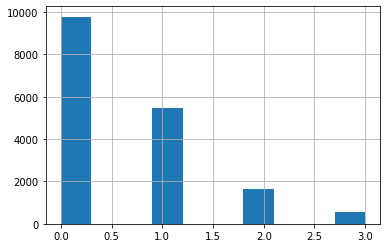

In [76]:
data['parks_around3000'].hist()

<AxesSubplot:>

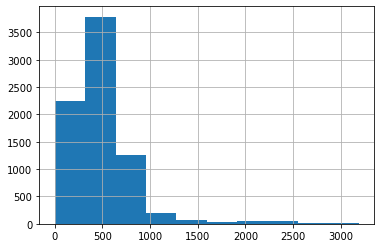

In [77]:
data['parks_nearest'].hist()

In [78]:
data['parks_around3000'].isna().sum()

5402

In [79]:
data['parks_nearest'].isna().sum()

15174

По паркам видим следующую тенденцию: у большинста объявлений система не нашла ни одного парка в радиусе 3 км, у четверти квартир только 1 парк поблизости, и очень редко встречаются варианты с 2-3 парками в доступе. Незаполненых значений примерно 20-25%, что опять указывает на то, что система подтягивает картографические данные не идеально.

Расстояние до парка оказалось определено только у 40% объявлений, что подтверждает, проблемы с автоматическим сбором данных. Даже в части тех объявлениий, где количество парков было определено, система не определила растояние.

Проделаем аналогичные действия с данными о водоемах.

<AxesSubplot:>

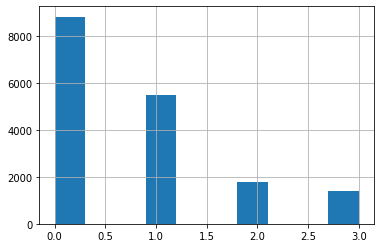

In [80]:
data['ponds_around3000'].hist()

<AxesSubplot:>

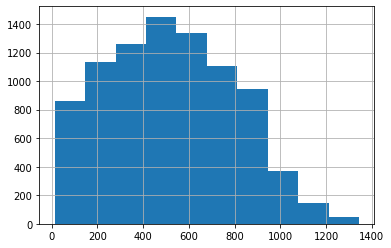

In [81]:
data['ponds_nearest'].hist()

In [82]:
data['ponds_around3000'].isna().sum()

5402

In [83]:
data['ponds_nearest'].isna().sum()

14219

Ситуация с парками и водоемами практически идентична. Если оценивать имеющиеся картографические данные, то они выглядят реалистично. Большинство объектов недвижимости не имеют рядом парка или водоема, примерно 20-30% продают квартиру рядом с парком/водоемом и гораздо реже встречаются варианты с 2мя и более местами отдыха. Растояние до них тоже выглядит правдоподобно.
Но большое количество пропусков указывает на то, что даные часто не подгружаются. Не будем исправлять значения в этих столбцах тоже, оставим в неизменном виде, чтобы команда Яндекс.Недвижимости владела реалистичной картиной и мы проводилли исследование на более объективных данных.

In [84]:
data['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

### 12. Столбец `days_exposition`

В этом столбце должны храниться данные о количестве дней, пока квартира продавалась (сколько объявление было размещено на сатйе Яндекс.Недвижимость)

In [85]:
data['days_exposition'].describe()

count    19831.000000
mean       179.365841
std        217.654871
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что среднее и медиана очень сильно различаются. Это связано с аномальными выбросами - некоторые квартиры "висели" на сайте годами. 
Посторим гистограмму ограничив ее годом.

<AxesSubplot:>

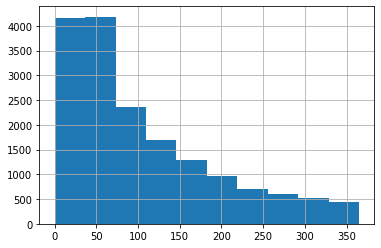

In [86]:
data['days_exposition'].hist(range=(0,365))

Заметно, что большинство квартир размещаются 1-2 месяца. Причем пик в 1 месяц не обязательно подтвержает, что квартиру за месяц продали, возможно есть другие причины, что объявление сняли с публикации (например, что со второго месяца, размещение становится платным). Чтобы точнее оценить динамику по снятию объявлений, стоит проконсультироваться с коллегами из Яндекс.Недвижимости, каковы у них условия размещения объявлений.
Но предварительно можно сказать, что обычно квартира продается за 1-3 месяца. 
Минимум  в 1 день - скорее всего случайный выброс. И объявления, которые были размещены больше года, мало похожи на "живые" варианты, скорее какие-то сомнительные объявления или специфические "заманки" риэлтеров.

За крайние значения лучше взять следующие:
- 7 дней - необычайно быстрая продажа квартиры
- 365 дней - крайне долгая продажа

<AxesSubplot:>

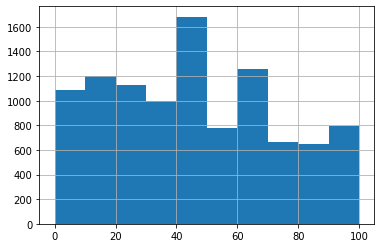

In [87]:
data['days_exposition'].hist(range=(0,100))

In [88]:
data['days_exposition'].isna().sum()

3031

Так как этот столбец тоже должен заполняться автоматом, странно видеть здесь столько пустых значений. Однозначно стоит и об этом сообщить в Яндекс.Недвижимость. Заполнять пропуски не будем.

## Изменение типов данных

Еще в самом начале исследования мы определили в каких столбцах необходимо изменить типы данных:
- 3   `first_day_exposition`   object  ->  *datetime*  - тк это дата и время размещения объявления
- 6   `floors_total`           float64  ->  *int*      - тк это количество этажей в здании
- 9   `is_apartment`           object   ->  *bool*     - тк возможны только значения True/False
- 13  `balcony`                float64  ->  *int*      - тк количество балконов
- 17  `parks_around3000`       float64  ->  *int*      - тк количество парков на расстоянии 3 км
- 19  `ponds_around3000`       float64  ->  *int*      - тк количество водоемов на расстоянии 3 км
- 21  `days_exposition`        float64  ->  *int*      - тк количество дней экспозиции


In [89]:
# оставлю закомментированными те строки, по котрым замена типа не прошла. Вышла ошибка, что Nan нельзя преобразовать в тип int

data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

## Устранение дубликатов

Сначало проверим датафрейм на наличие явных дубликатов

In [90]:
data.duplicated().sum()

0

Отлично! Явных дубликатов не обнаружено, теперь разберемся с неявными дубликатами в единственном строковом столбце `locality_name`.
Выведем уникальные значения в этом столбце.

In [91]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Изучим данные и найдем, где еще могут быть спрятаны дубликаты.

Большинство задвоейний происходит, из-за того, что пишут "посЕлок" и "посЁлок". Так же есть две вариации на тему "поселок городского типа". Встречаются также названия без обозначения к какому населенному пункту они относятся.
 - дубликаты: `'поселок Мурино' 'посёлок Мурино''Мурино' 'Кудрово' 'деревня Кудрово''посёлок Бугры', 'поселок Бугры' 'поселок Новый Свет' 'посёлок Новый Свет' 'поселок городского типа Рощино' посёлок городского типа Рощино' 'посёлок городского типа имени Свердлова', 'городской посёлок Виллози'` и тд

Отредактируем названия населенных пунктов. Сначала исправим все "посЁлоки" на "посЕлоки", затем унифицируем все поселки городского типа, а также исключим дублирования названий "Мурино" и "Любань".

In [115]:
# заменим везде букву "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# заменим "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
my_list = ['Любань']
# заменим дубликаты в названиях Любань и Мурино
data['locality_name'] = data['locality_name'].str.replace('Любань', 'поселок Любань')
data['locality_name'] = data['locality_name'].str.replace('Мурино', 'поселок Мурино')

data['locality_name'] = data['locality_name'].str.replace('поселок поселок Любань', 'поселок Любань')
data['locality_name'] = data['locality_name'].str.replace('поселок поселок Мурино', 'поселок Мурино')

sorted(data['locality_name'].unique())

# еще раз проверим не появились ли явные дубликаты
data.duplicated().sum()

0

## Категоризация данных и расчет дополнительных значений

### Цена за квадратный метр

In [94]:
# добавим в датафрейм цену за 1 кв.м
data['price_sq_meter'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter
0,20,13000000.0,108.0,2019-03-07,3,2.7000,16,51.00000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.6075,11,18.60000,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.7000,5,34.30000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.7000,14,90.76898,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
5,10,2890000.0,30.4,2018-09-10,1,2.6000,12,14.40000,5,False,...,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474


In [95]:
data['price_sq_meter'].describe()

count     22862.000000
mean      97461.373374
std       41203.192934
min        7962.962963
25%       76136.363636
50%       94540.084609
75%      113333.333333
max      848484.848485
Name: price_sq_meter, dtype: float64

<AxesSubplot:>

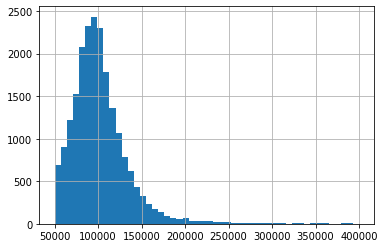

In [96]:
data['price_sq_meter'].hist(bins=50, range=(50000, 400000))

Гистограмма напоминает нормальное распределение, среднее и медиана достаточно близки (благодаря скорректированным ранее выбросам). Самый частотный интервал значений от 76 тр до 113 тр за кв.м. Далее нужно понять с данными за какой период мы имеем дело. На сегоднящний день цена кажется низкой для Питера и ЛО.  

### Добавим дополнительные столбцы с параметрами даты публикации и расстояния до центра

In [97]:
# Добавим столбцы с днями недели, месяц, год
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


Добавили столбцы: день недели, месяц и год, когда было размещено объявление.
Теперь напишем функцию, которая переведет растояние от центра в километры.

In [98]:
# функция возвращает расстояние в км
def get_km(value):
    try:
        return round(value/1000)
    except:
        pass
# заносим значения в новый столбец    
data['cityCenters_nearest_km'] = data['cityCenters_nearest'].apply(get_km)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.7000,16,51.00000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.6075,11,18.60000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.7000,5,34.30000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.7000,14,90.76898,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,7.0
5,10,2890000.0,30.4,2018-09-10,1,2.6000,12,14.40000,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,NaN


In [99]:
# добавляем в датафрейм категории этажей
data.loc[data['floor']==1,'kind_floor'] = 'Первый'
data.loc[data['floor']==data['floors_total'],'kind_floor'] = 'Последний'
data['kind_floor'] = data['kind_floor'].fillna('Другой')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,cityCenters_nearest_km,kind_floor
0,20,13000000.0,108.00,2019-03-07,3,2.7000,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.6075,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.7000,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.7000,14,90.768980,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,7.0,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.6000,12,14.400000,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,NaN,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.6400,26,10.600000,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,19.0,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.7000,24,40.874585,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,12.0,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.7000,27,15.430000,26,False,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,NaN,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.5000,9,43.600000,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,15.0,Другой
10,5,5050000.0,39.60,2017-11-16,1,2.6700,12,20.300000,3,False,...,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,14.0,Другой


Посмотрим, как различаются цены всей квартиры и одного квадратного метра в зависимости от категории этажа.

In [100]:
# группируем цену квартиры по категориям этажа и выводим MIN, MAX, MEAN
data.groupby('kind_floor')['last_price'].agg(["min", "max", "mean"])

,min,max,mean
kind_floor,,,
Другой,450000.0,98000000.0,6.108461e+06
Первый,430000.0,51000000.0,4.531348e+06
Последний,430000.0,85000000.0,5.459853e+06


In [101]:
# группируем цену кв. метра по категориям этажа и выводим MIN, MAX, MEAN
data.groupby('kind_floor')['price_sq_meter'].agg(["min", "max", "mean"])

,min,max,mean
kind_floor,,,
Другой,10368.663594,848484.848485,101836.488961
Первый,9615.384615,440000.000000,81225.319746
Последний,7962.962963,600000.000000,88798.995116


У дешовой недвижимости цена не так зависит от этажности, но с ростом конечной стоимости объекта (и квадратного метра) разница становится более существенной. У элитной (дорогой) недвижимости цена за "Первый" и "Другой" этажи может отличаться в два раза. 

Сымае предпочтительные этажи для покупателя относятся к категории "Другой" - цена на них выше, на втором месте "Последние этажи" - они в среднем дешевле на 10%.

### Анали даты размещения объявления

<AxesSubplot:>

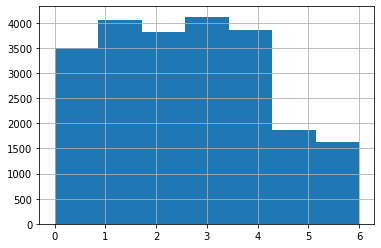

In [102]:
data['weekday'].hist(bins=7)

В будни дни объявления размещают в двое чаще, чем на выходных. Это объяснимо, ведь большинство квартир сейчас продаются через агентства, и риэлторы добавляют объявления по будням. 

<AxesSubplot:>

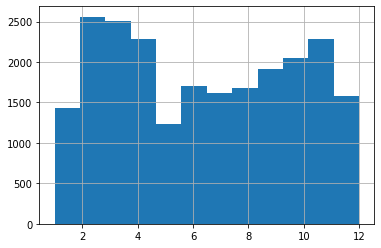

In [103]:
data['month'].hist(bins=12)

Можно отметить сезонность в увеличении объявлений. Ожидаемый рост числа объявлений с февраля по май, затем спад на летний период (отпуска/дачи), осенью снова увеличение количества вариантов, а декабрь и январь очередной спад из-за Новогодней суеты и каникул.

<AxesSubplot:>

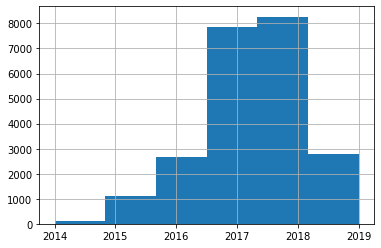

In [104]:
data['year'].hist(bins=6)

In [105]:
# определим каким числом сохранено последнее объявление в датафрейме
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

C 2014 года ресурс Яндекс.Недвижимость начал разывитие и до 2017 года имел хороший прирост (самый большой скачек в 3 раза наблюдался в 2016-2017 гг), затем была стогнация 2017-2018.
Данные по 2019 году только за 5 месяцев, поэтому дальнейшую динамику сложно точно оценить.

Нарисуем тепловую диаграмму и определим от каких параметров зависит конечная стоимость объектов недвижимости.

### Влияние различных параметров на конечную стоимость недвижимости

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

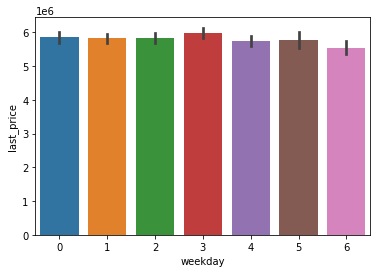

In [106]:
import seaborn as sns
sns.barplot(data=data, x='weekday', y='last_price')

<AxesSubplot:xlabel='month', ylabel='last_price'>

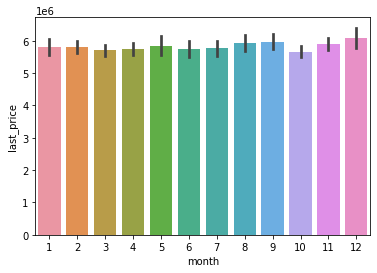

In [107]:
sns.barplot(data=data, x='month', y='last_price')

<AxesSubplot:xlabel='year', ylabel='last_price'>

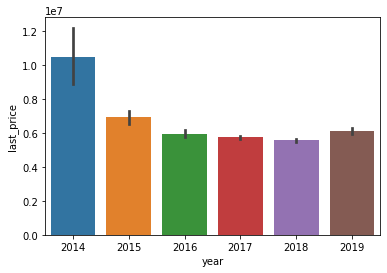

In [108]:
sns.barplot(data=data, x='year', y='last_price')

### Средняя цена квадратного метра в зависимости от населенного пункта

In [109]:
# создадим список ТОП-10 из населенных пунктов, в которых размещено больше всего объявлений
data_top_10 = data['locality_name'].value_counts().head(10).index
data_top_10.unique()

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

In [110]:
# расчитаем среднюю цену квадратного метра, в каждом из выбранных населенных пунктов
data_filtred = data.query('locality_name in @data_top_10').groupby('locality_name')['price_sq_meter'].agg('mean')
data_filtred

locality_name
Всеволожск            68646.448530
Выборг                58075.893731
Гатчина               68746.146763
Колпино               75333.295801
Пушкин               102869.768340
Санкт-Петербург      112412.973834
деревня Кудрово       92297.218847
поселок Мурино        85465.667556
поселок Парголово     90448.423806
поселок Шушары        78303.212578
Name: price_sq_meter, dtype: float64

In [111]:
# расчитаем среднюю цену в каждом регионе Ленинской области, результат отсортируем по убыванию
data.groupby('locality_name')['price_sq_meter'].agg('mean').sort_values(ascending=False)

locality_name
Зеленогорск              117810.585243
Санкт-Петербург          112412.973834
поселок Репино           104238.614786
Пушкин                   102869.768340
Сестрорецк               102107.818481
                             ...      
поселок Совхозный         12629.129129
деревня Выскатка          12335.480902
деревня Вахнова Кара      11688.311688
поселок станции Свирь     11481.481481
деревня Старополье        11206.221198
Name: price_sq_meter, Length: 318, dtype: float64

Как и ожидалось из списака ТОП-10, наиболее дорогой квадратный метр жилья в Питере - 112 тр, наименьшая стоимость квадратного метра в Выборге - около 58 тр.

Но если смотреть по всей Ленинградской области, то жилье в Спб на втором месте. А лидер по стоимости за квадрат - Зеленогорск. 
Судя по данным в интернете - это курортный городок в Ленинградской области, поэтому не удивтельно, что там не так много предложений и выше всего цена.

Минимальные цены на жилье в небольших удаленных деревеньках - от 11 тр за квадрат.
Например, по данным из Википедии, деревня Старополье находится в 50 км от районного центра и в ней на 2017 год проживало около 800 человек.

### Цена одного километра удаленного от центра Питера

In [112]:
# создаем новый столбец 'price_one_km' и заносим туда цену одного километра (удаленного от центра города) в Спб
# поделим конечную цену тех питерских квартир, в котрых известно расстояние до центра на само это расстояние в километрах
data['price_one_km'] = data.loc[(data['locality_name'] == "Санкт-Петербург")&(data['cityCenters_nearest_km'].notna())]['last_price']\
/data.loc[(data['locality_name'] == "Санкт-Петербург")&(data['cityCenters_nearest_km'].notna())]['cityCenters_nearest_km']

# проверим, что столбец расчитался правильно
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,cityCenters_nearest_km,kind_floor,price_one_km
0,20,13000000.0,108.00,2019-03-07,3,2.7000,16,51.000000,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,Другой,8.125000e+05
1,7,3350000.0,40.40,2018-12-04,1,2.6075,11,18.600000,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,Первый,NaN
2,10,5196000.0,56.00,2015-08-20,2,2.7000,5,34.300000,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,Другой,3.711429e+05
3,0,64900000.0,159.00,2015-07-24,3,2.7000,14,90.768980,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,7.0,Другой,9.271429e+06
5,10,2890000.0,30.40,2018-09-10,1,2.6000,12,14.400000,5,False,...,NaN,NaN,55.0,95065.789474,0,9,2018,NaN,Другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.6400,26,10.600000,6,False,...,0.0,NaN,155.0,99195.710456,3,11,2017,19.0,Другой,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.7000,24,40.874585,22,False,...,0.0,NaN,NaN,110544.692737,3,4,2019,12.0,Другой,6.595833e+05
8,20,2900000.0,33.16,2018-05-23,1,2.7000,27,15.430000,26,False,...,NaN,NaN,189.0,87454.764777,2,5,2018,NaN,Другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.5000,9,43.600000,7,False,...,0.0,NaN,289.0,88524.590164,6,2,2017,15.0,Другой,3.600000e+05
10,5,5050000.0,39.60,2017-11-16,1,2.6700,12,20.300000,3,False,...,2.0,553.0,137.0,127525.252525,3,11,2017,14.0,Другой,3.607143e+05


<AxesSubplot:xlabel='cityCenters_nearest_km'>

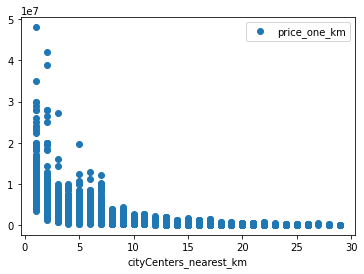

In [113]:
data.plot(x='cityCenters_nearest_km', y='price_one_km', style='o')

In [114]:
data['price_one_km'].describe()

count    1.501900e+04
mean              inf
std               NaN
min      8.333333e+04
25%      3.076154e+05
50%      4.400000e+05
75%      9.074825e+05
max               inf
Name: price_one_km, dtype: float64

На графике наглядно видно, что чем ближе квартира расположена к центру Питера, тем шире диапазон цены за каждый киллометр. Есть цены соответствующие средним по всему городу, а есть и в 4-5 раз дороже. В целом самыми дорогими квартирами за 1 километр, можно считать квартиры расположенные в 7 километровой зоне от центра города.

Если квартира расположена более, чем на 10 км от центра, то цена последующего километра не так сильно отличается и составляет около 300-400 тр за км.

# Выводы

При первичном знакомстве с данными во входном файле, стало понятно, что требуется предварительная обработка данных, чтобы можно было в дальнейшем использовать их для анализа.

обнаруженные проблемы в качестве данных:
- имелись пустые значения в столбцах: ceiling_height, floors_total, living_area, floor, is_apartment, ponds_around3000	ponds_nearest, days_exposition, kitchen_area, balcony, airports_neares, cityCenters_nearest, parks_around3000, parks_neares
- в столбцах имелось несоотвествие типов тем данным, которые эти столбцы предполагают
- некоторые названия населеных пунктов имели неявные дублированные значения
- наблюдалась явная проблема с автоматически подгружаемыми картографическими данными. Примерно честверть значений была незаполнена. На корретность работы этой функции стоит обратить отдельное внимание.

что было сделано при предобработке данных:
- проанализирована причина пропущеных значений, выбрано оптимально решение по обработке этих пропусков. Часть значений была заменена подходящими по значению данными, вторую часть пропусков оставили без изменений.
- устранены все неявные дубликаты в базе
- где это было возможно, заменили тип данных на соответствующий значениям
- удалены все аномальные выбросы по всем столбца датафрейма

рекомендации по улучшению качества хранимых данных:
- в столбцах, где предполагается булевы значения, поставить значение "по умолчанию" - False, чтобы в дальнейм избежать пропусков
- в столбце с количеством балконов, конкретно указать, что требуется ввести именно КОЛИЧЕСТВО, а не площадь
- проверить типы столбцов на соотвествие хранимым данным
- унифицировать названия населенных пунктов, чтобы избежать возникновения дубликатов
- проверить корректность занесения картографических данных


В результате проведенного исследования можно сделать следующие выводы:
- Конечная цена квартиры зависит в первую очередь от общей и жилой площадей. От этажа, площади кухни или дня размещения эта величина практически не зависит
- На рынке недвижимости сущетсвует определенная сезонность. В межсезонье весна/осень - на рынке появляется больше вариантов продаваемых квартир
- Самые дорогие квартиры расположены в Спб, близко к центру, паркам, каналам и имеют не крайний этаж. Но есть варианты в курортных городках ЛО, где цена за кв метр превосходит Питерские.
- Чем ближе квартира расположена к центру Питера, тем дороже может быть 1 километр. Самые эксклюзивные варианты имеют цену одного километра около 50 млн руб.
- Этажность влияет на стоимость, при чем это влияние тем больше, чем дороже общая цена квартиры. У дешевых вариантов квартир, роль категории этажа не так значительна.
- В среднем квартира продается за 1-3 месяца, но встречаются варианты, которые "улетают" за неделю и "висяки", которые продаются больше года.
- Средняя цена на квартиры остается стабильной в течение всего года, колебаний стоимости до дням и месяцам не наблюдалось
- Средняя годовая стоимость квартир за 2016-2018 гг была практически неизменной, не смотря на рост количества предложений на рынке
    